# Problem Statement

> #### Used Cars Sale on E-bay

+ In an increasingly competitive market for automobile, understanding the dynamics of Used Cars with diverse features is critical for both Sellers and Buyers .
+ This aims to conduct a comprehensive analysis of Used Cars with a focus on various key factors such as name,  seller, offerType, price, abtest, vehicleType, yearOfRegistration, gearbox, powerPS, model, kilometer, brand, fuelType, lastSeen,        monthOfRegistration, notRepairedDamage, dateCreated, nrOfPictures, postalCode,     
                

## import all the libraries

In [1]:
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as ss
import scipy.stats as s

# Data Cleaning

In [2]:
# encoding errors can be solved 2 ways:
"""with open('autos.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
df=pd.read_csv('autos.csv', encoding = enc['encoding'])"""

df = pd.read_csv('autos.csv',encoding_errors = 'replace')

In [3]:

df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
#checking null values in columns
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
# geting mode from the list 
def mode(x):
    return x.mode()[0]

In [7]:
#filling nan values in columns data Frame
def fillNan(grouped_df,groupby_df,groupby_list,grouped_list):
    for i in range(len(grouped_df)):
        if grouped_df[i] == 'Nan':
            for m,n in zip(groupby_list,grouped_list):
                if groupby_df[i] == m:
                    grouped_df[i] = n

In [8]:
# grouping brand and vehicleType into dataFrame
vehicleType_df = pd.DataFrame(df.groupby(['brand'])['vehicleType'].agg(mode))
vehicleType_df = vehicleType_df.reset_index()


In [9]:
vehicleType_brand_list = vehicleType_df['brand']
vehicleType_list = vehicleType_df['vehicleType']

In [10]:
#replacing all types of NaN,Nae,nan, with Nan
df['vehicleType'].fillna('Nan', inplace = True)

In [11]:
#filling nan values in vehicleType with mode
fillNan(df['vehicleType'],df['brand'],vehicleType_brand_list,vehicleType_list)

C:\Users\eternal\AppData\Local\Temp\ipykernel_8888\3674287570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df[i] = n


In [12]:
# grouping brand and gearbox into dataFrame
gearbox_df = pd.DataFrame(df.groupby(['brand'])['gearbox'].agg(mode))
gearbox_df = gearbox_df.reset_index()

In [13]:
gearbox_brand_list = gearbox_df['brand']
gearbox_list = gearbox_df['gearbox']

In [14]:
#replacing all types of NaN,Nae,nan, with Nan
df['gearbox'].fillna('Nan', inplace = True)

In [15]:
#filling nan values in gearbox with mode
fillNan(df['gearbox'],df['brand'],gearbox_brand_list,gearbox_list)

C:\Users\eternal\AppData\Local\Temp\ipykernel_8888\3674287570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df[i] = n


In [16]:
#droping brand which contains sonstige_autos
df = df.drop(df[df['brand'] == 'sonstige_autos'].index)
df.reset_index(drop=True, inplace=True)

In [17]:
# grouping brand and model into dataFrame
model_df = pd.DataFrame(df.groupby(['brand'])['model'].agg(mode))
model_df = model_df.reset_index()

In [18]:
model_brand_list = model_df['brand']
model_list = model_df['model']

In [19]:
#replacing all types of NaN,Nae,nan, with Nan
df['model'].fillna('Nan', inplace = True)

In [20]:
#filling nan values in model with mode
fillNan(df['model'],df['brand'],model_brand_list,model_list)

C:\Users\eternal\AppData\Local\Temp\ipykernel_8888\3674287570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df[i] = n


In [21]:
# grouping brand and notRepairedDamage into dataFrame
notRepairedDamage_df = pd.DataFrame(df.groupby(['brand'])['notRepairedDamage'].agg(pd.Series.mode))
notRepairedDamage_df = notRepairedDamage_df.reset_index()

In [22]:
notRepairedDamage_brand_list = notRepairedDamage_df['brand']
notRepairedDamage_list = notRepairedDamage_df['notRepairedDamage']

In [23]:
#replacing all types of NaN,Nae,nan, with Nan
df['notRepairedDamage'].fillna('Nan', inplace = True)

In [24]:
#filling nan values in notrepairedDamage with mode
fillNan(df['notRepairedDamage'],df['brand'],notRepairedDamage_brand_list,notRepairedDamage_list)

C:\Users\eternal\AppData\Local\Temp\ipykernel_8888\3674287570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df[i] = n


In [25]:
# grouping model and fuelType into dataFrame
fuelType_df = pd.DataFrame(df.groupby(['model'])['fuelType'].agg(mode))
fuelType_df = fuelType_df.reset_index()

In [26]:
fuelType_model_list = fuelType_df['model']
fuel_list = fuelType_df['fuelType']

In [27]:
#replacing all types of NaN,Nae,nan, with Nan
df['fuelType'].fillna('Nan', inplace = True)

In [28]:
#filling nan values in fuelType with mode
fillNan(df['fuelType'],df['model'],fuelType_model_list,fuel_list)

C:\Users\eternal\AppData\Local\Temp\ipykernel_8888\3674287570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df[i] = n


In [29]:
# checking null values
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [30]:
# changing data type object to datetime
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [31]:
df['yearOfRegistration'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1974, 1979, 1955, 1978,
       1972, 1977, 1961, 1960, 1966, 1975, 1937, 1963, 1936, 5000, 1954,
       1956, 1000, 1962, 9999, 1500, 2200, 1964, 1951, 3000, 2066, 1949,
       1940, 2019, 1800, 1953, 1957, 1234, 1958, 8000, 1941, 9000, 2900,
       5900, 5911, 1933, 1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932,
       1927, 1931, 3700, 1942, 1935, 6500, 1923, 2290, 2500, 1930, 1001,
       6200, 7000, 1929, 1943, 1947, 1934, 1938, 1688, 6000, 2800, 1928,
       7500, 1919, 5555, 5600, 1939, 1039, 1300, 2222, 4500, 1602, 7800,
       9229, 7100, 8200, 1600], dtype=int64)

In [32]:
# keeping data only from 1900 to 2023 year of Registration
df['yearOfRegistration'].where(((df['yearOfRegistration'] < 2023) & (df['yearOfRegistration'] > 1900)),inplace = True)

In [33]:
# filling nan value with mode
df['yearOfRegistration'].fillna(df['yearOfRegistration'].mode()[0] , inplace = True)

In [34]:
#chqnging data type into int
df['yearOfRegistration'] = df['yearOfRegistration'].astype('int64')

In [35]:
df['monthOfRegistration'].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

In [36]:
#keeping data only from  1 to 12
df['monthOfRegistration'].where(((df['monthOfRegistration'] < 13) & (df['monthOfRegistration'] > 0)),inplace = True)

In [37]:
# grouping yearOfRegistration andmonthOfRegistration into dataFrame
monthOfRegistration_df = pd.DataFrame(df.groupby(['yearOfRegistration'])['monthOfRegistration'].agg(mode))
monthOfRegistration_df = monthOfRegistration_df.reset_index()

In [38]:
yearOfRegistration_list = monthOfRegistration_df['yearOfRegistration']
monthOfRegistration_list = monthOfRegistration_df['monthOfRegistration']

In [39]:
#replacing all types of NaN,Nae,nan, with Nan
df['monthOfRegistration'].fillna('Nan', inplace = True)

In [40]:
#filling nan values in monthOfRegistration with mode
fillNan(df['monthOfRegistration'],df['yearOfRegistration'],yearOfRegistration_list,monthOfRegistration_list)

In [41]:
#changing datatype into int
df['monthOfRegistration'] = df['monthOfRegistration'].astype('int64')

In [42]:
#dropinging duplicates
df = df.drop_duplicates(keep="first")
df.reset_index(drop = True , inplace = True)

In [43]:
#saving cleaned data in csv file
df.to_csv('autos_after_cleaning.csv', index=False)

In [44]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,limousine,1993,manuell,0,golf,150000,3,benzin,volkswagen,nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,a4,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367537,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,limousine,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21,0,2694,2016-03-21 10:42:49
367538,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12
367539,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26
367540,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein,2016-03-20,0,40764,2016-03-24 12:45:21


# EDA

### Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot¶

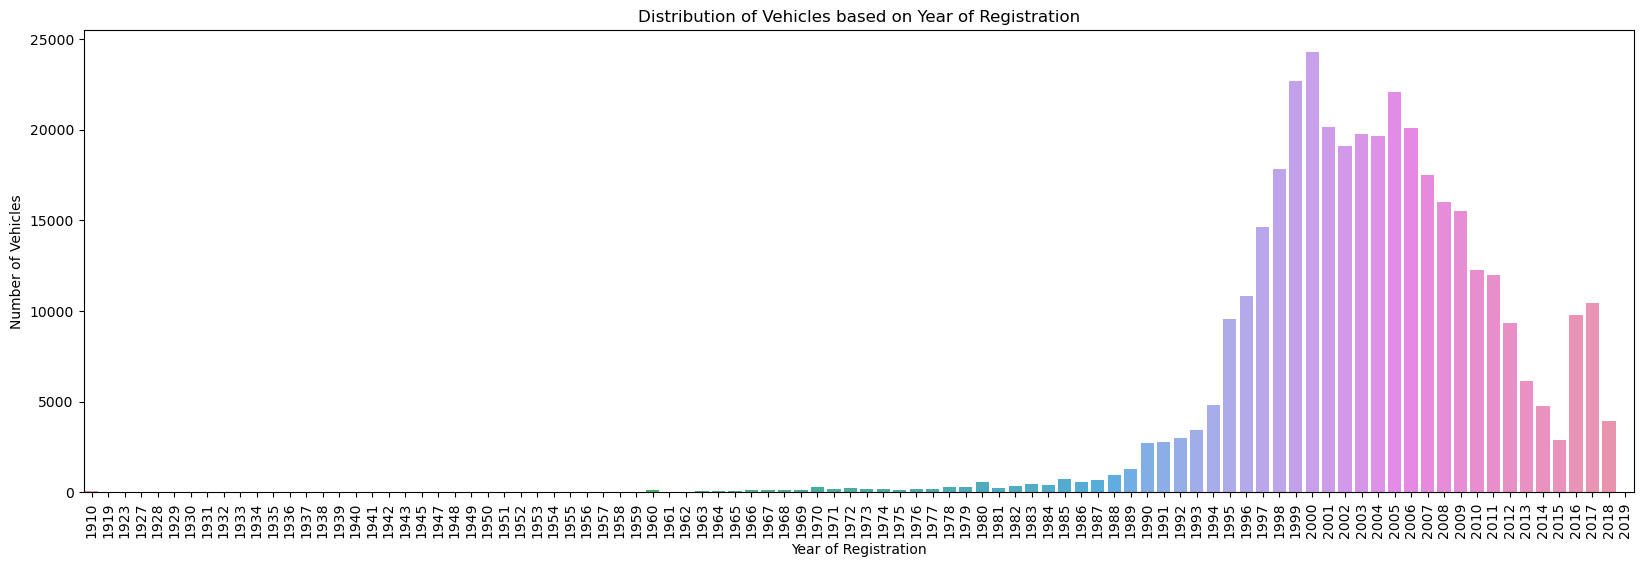

In [45]:
plt.figure(figsize = (20, 6))
sns.countplot(data = df, x = 'yearOfRegistration')
plt.title('Distribution of Vehicles based on Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation = 90)  # Rotate x-labels for better readability
plt.show()

from year 1995 to 2012 number of vehicle registeration has always above 10000 but in year 2000 has highest number of vehichle registration

### Create a plot based on the Variation of the price range by the vehicle type

In [46]:
vehicle_type_price = df.groupby('vehicleType')['price'].mean()
vehicle_type_price = vehicle_type_price.reset_index()

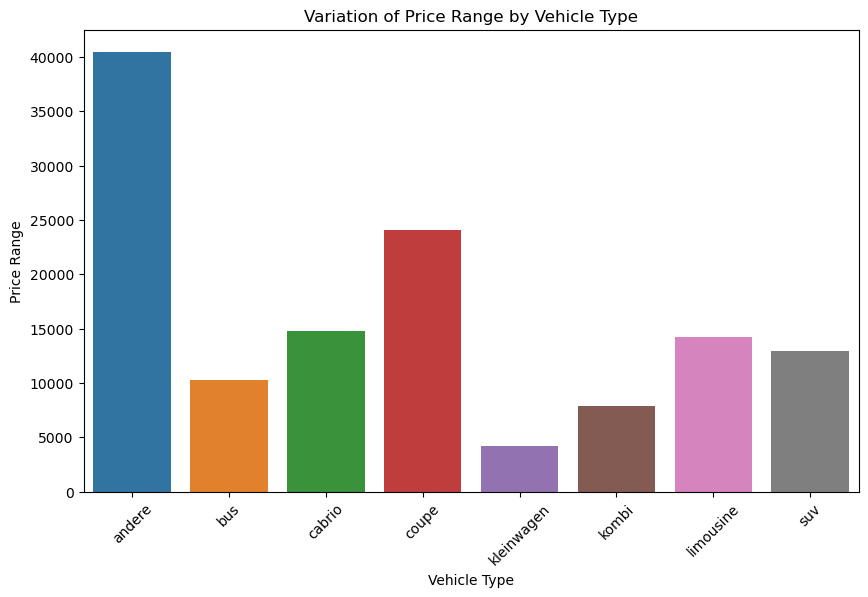

In [47]:
plt.figure(figsize = (10, 6))
sns.barplot(y = "price",x="vehicleType",data=vehicle_type_price)
plt.xlabel('Vehicle Type')
plt.ylabel('Price Range')
plt.title('Variation of Price Range by Vehicle Type')
plt.xticks(rotation = 45)  # Rotate x-axis labels for readability
plt.show()

andere Vehicle Type has highest price around 40000 and least kleinwagen Vehicle Type has lowest price around 5000

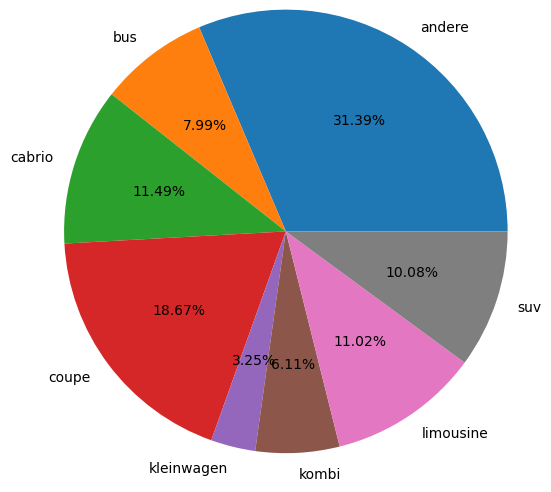

In [48]:
plt.pie(vehicle_type_price.price, labels = vehicle_type_price.vehicleType,autopct = '%1.2f%%',radius = 1.5)
plt.show()

### Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client.

In [49]:
Vehicle_count = df["vehicleType"].value_counts()

In [50]:
Vehicle_count

limousine     114818
kleinwagen     95859
kombi          68065
bus            30129
cabrio         22504
coupe          18567
suv            14510
andere          3090
Name: vehicleType, dtype: int64

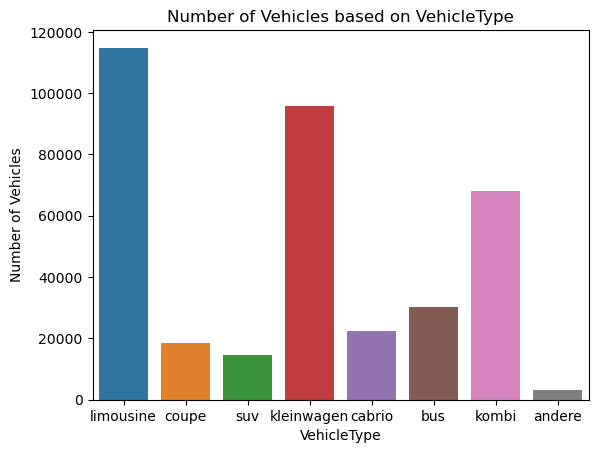

In [51]:
sns.countplot(data=df, x='vehicleType')
plt.title('Number of Vehicles based on VehicleType')
plt.xlabel('VehicleType')
plt.ylabel('Number of Vehicles')
plt.show()

limousine vehicle Type has most number and andere has least number of vehicle Type in E-bay

### Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis).

In [52]:
correlation = df['price'].corr(df['kilometer'])
correlation

-0.007683223435759002

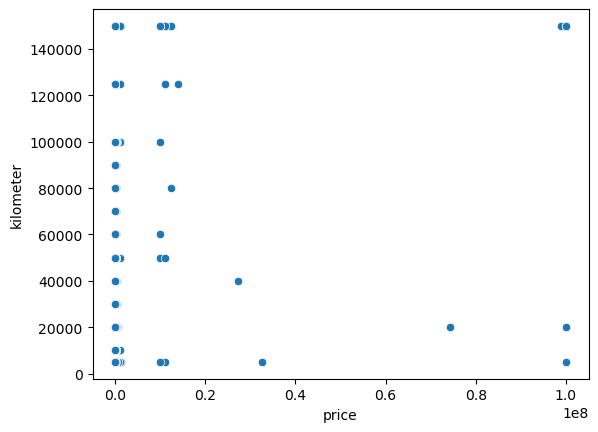

In [53]:
sns.scatterplot(x = "price",y = "kilometer",data = df)
plt.show()

no correlation between price and kilometer

#### Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization.

In [54]:
vehicle_count = df['brand'].value_counts()
vehicle_count_df = pd.DataFrame(vehicle_count)

In [55]:
vehicle_count_df

,brand
volkswagen,79639
bmw,40274
opel,40136
mercedes_benz,35307
audi,32873
ford,25573
renault,17969
peugeot,11027
fiat,9676
seat,7022


In [56]:
# rename columns
vehicle_count_df.rename(columns = {"brand":"val_counts"},inplace = True)

In [57]:
vehicle_count_df

,val_counts
volkswagen,79639
bmw,40274
opel,40136
mercedes_benz,35307
audi,32873
ford,25573
renault,17969
peugeot,11027
fiat,9676
seat,7022


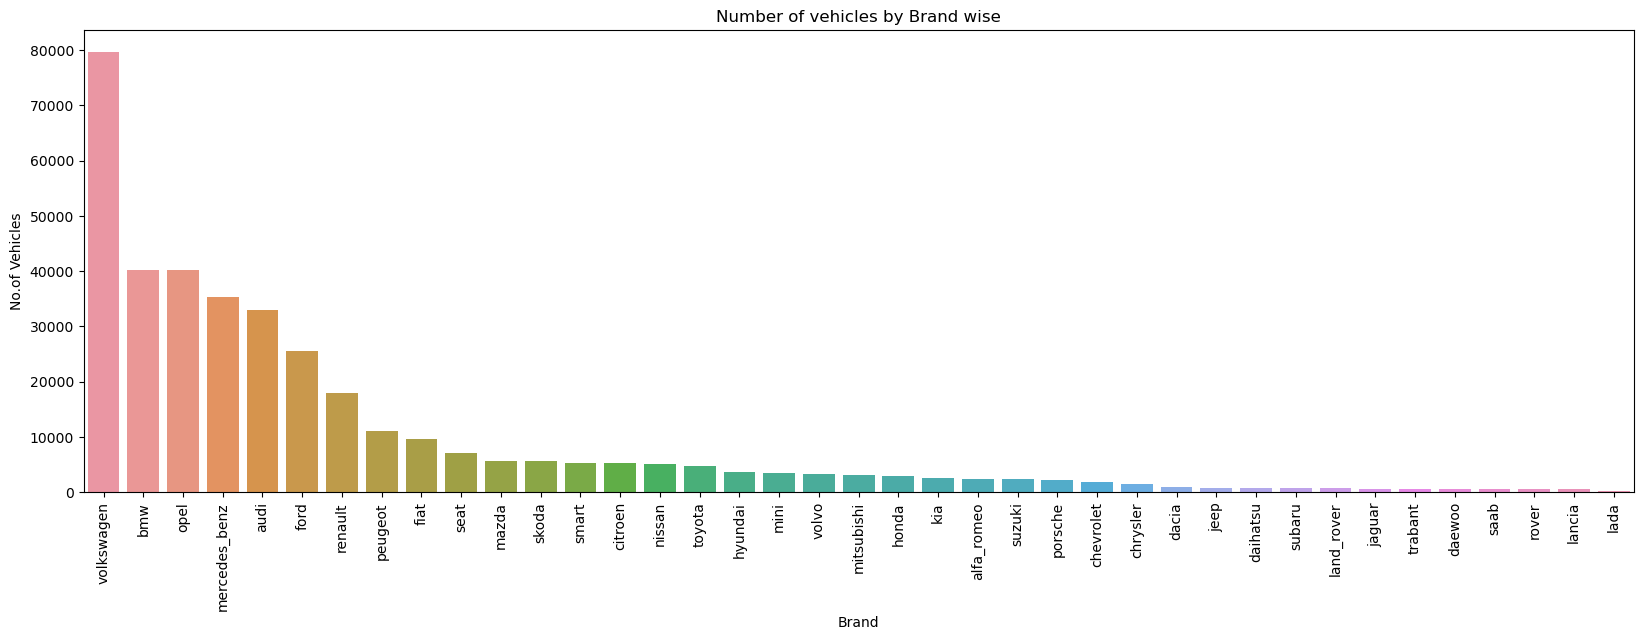

In [58]:
plt.figure(figsize = (20, 6))
sns.barplot(data = vehicle_count_df ,x = vehicle_count.index,y = "val_counts")
plt.title('Number of vehicles by Brand wise')
plt.xlabel('Brand')
plt.ylabel('No.of Vehicles')
plt.xticks(rotation = 90)
plt.show()

volkswagen brand has highest number of vehicles on E-bay 

### What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis.

In [59]:
vehicle_gp = df.groupby("vehicleType")[["price"]].mean()
vehicle_gp=vehicle_gp.reset_index()

In [60]:
vehicle_gp

,vehicleType,price
0,andere,40483.537217
1,bus,10302.154602
2,cabrio,14818.152195
3,coupe,24073.071794
4,kleinwagen,4188.791819
5,kombi,7882.399545
6,limousine,14210.157136
7,suv,12995.190972


In [61]:
gear_gp = df.groupby("gearbox")[["price"]].mean()
gear_gp=gear_gp.reset_index( )

In [62]:
gear_gp

,gearbox,price
0,automatik,16027.504194
1,manuell,9403.267766


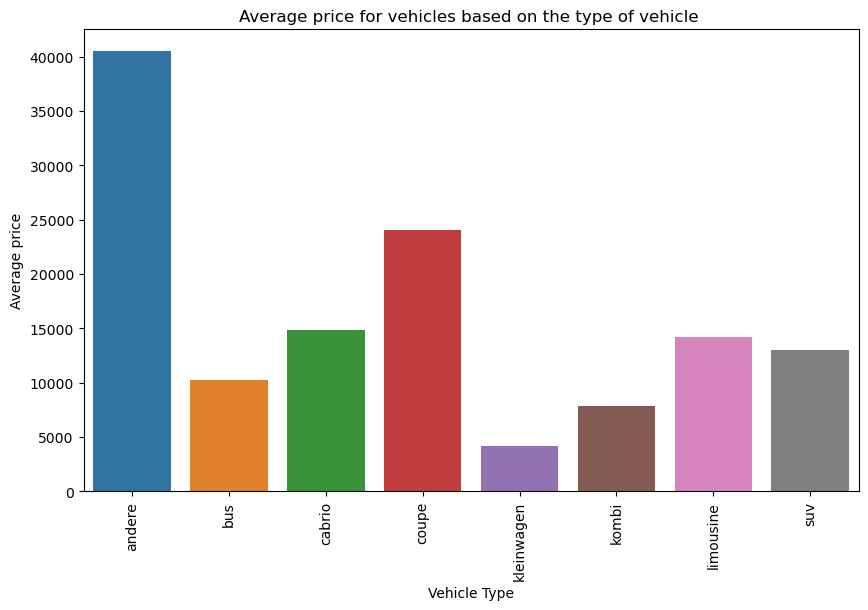

In [63]:
plt.figure(figsize = (10, 6))
sns.barplot(data = vehicle_gp,x = "vehicleType",y = "price")
plt.title('Average price for vehicles based on the type of vehicle ')
plt.xlabel('Vehicle Type')
plt.ylabel('Average price')
plt.xticks(rotation = 90)
plt.show()

andere has highest averege price around 40000 and kleinwagen has least average price around 5000

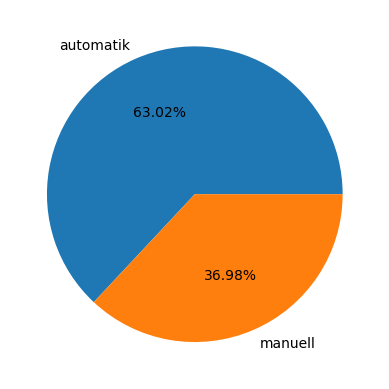

In [64]:
plt.pie(gear_gp.price, labels = gear_gp.gearbox ,autopct = '%1.2f%%')
plt.show()

automatic gearbox are highly available on e-bay than manual

### What is the marginal probability of private seller.¶

In [65]:
# marginal probability=count of private sellers / Total count of sellers
count_privat = df.seller.value_counts().max()           # count of privat sellers 
count_Gewerblich = df.seller.value_counts().min()     # count of Gewerblich sellers
count_seller = count_privat + count_Gewerblich                       # Total count of sellers

In [66]:
marginal_prob=count_privat/count_seller
marginal_prob

0.9999918376675319

### What is the Average price of vehicle by fuel type and gearbox type.Give a plot.

In [67]:
avg_price_fuel_gearbox = df.groupby(["fuelType","gearbox"])[["price"]].mean()
avg_price_fuel_gearbox = avg_price_fuel_gearbox.reset_index()
avg_price_fuel_gearbox

,fuelType,gearbox,price
0,andere,automatik,3127.185185
1,andere,manuell,2543.164062
2,benzin,automatik,11512.902986
3,benzin,manuell,9799.083665
4,cng,automatik,6631.000000
5,cng,manuell,4461.487572
6,diesel,automatik,20971.145118
7,diesel,manuell,8650.747973
8,elektro,automatik,11522.909091
9,elektro,manuell,3944.888889


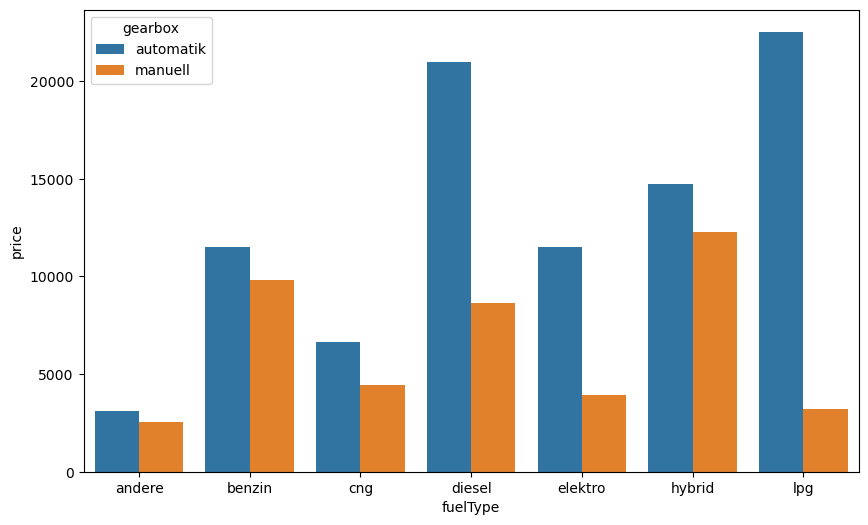

In [68]:
plt.figure(figsize = (10, 6))
sns.barplot(data = avg_price_fuel_gearbox , x = "fuelType", y = "price", hue = "gearbox")
plt.show()

for cars which has automatic gearbox fuel price are higher compared to gearbox

### What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot.

In [69]:
avg_power_vehicletype_gearbox = df.groupby(["vehicleType","gearbox"])[["powerPS"]].mean()
avg_power_vehicletype_gearbox = avg_power_vehicletype_gearbox.reset_index()
avg_power_vehicletype_gearbox

,vehicleType,gearbox,powerPS
0,andere,automatik,169.656766
1,andere,manuell,92.989595
2,bus,automatik,137.887810
3,bus,manuell,109.218067
4,cabrio,automatik,183.224539
5,cabrio,manuell,131.526974
6,coupe,automatik,213.727427
7,coupe,manuell,150.958616
8,kleinwagen,automatik,72.619872
9,kleinwagen,manuell,66.977733


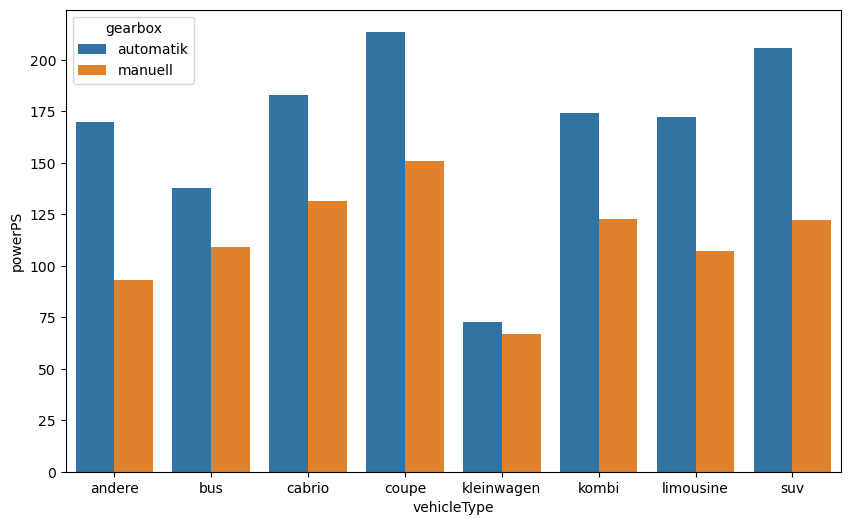

In [70]:
plt.figure(figsize = (10, 6))
sns.barplot(data = avg_power_vehicletype_gearbox, x = "vehicleType", y = "powerPS", hue = "gearbox")
plt.show()

### What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this.


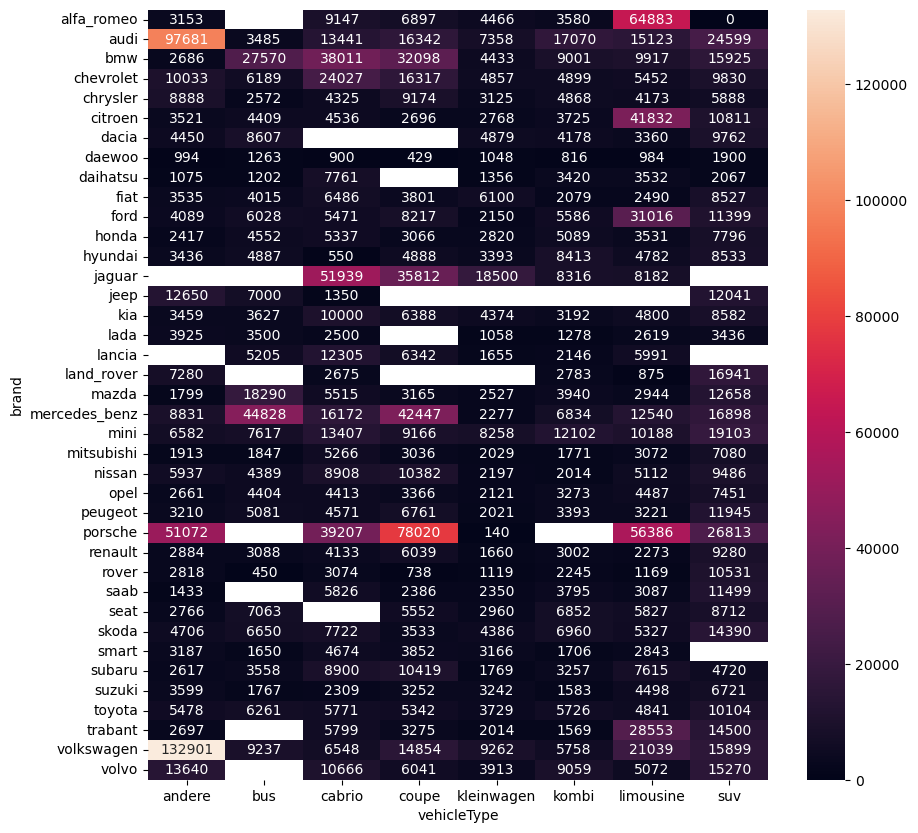

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(df['brand'], df['vehicleType'], values=df['price'], aggfunc='mean'), annot=True, fmt='.0f')
plt.show()

this plot between brand,vehicle type and price and mean is calculated from price

# Conclusion

- from year 1995 to 2012 number of vehicle registeration has always above 10000 but in year 2000 has highest number of vehichle   registration
- andere Vehicle Type has highest price around 40000 and least kleinwagen Vehicle Type has lowest price around 5000
- volkswagen brand has highest number of vehicles on E-bay 
- limousine vehicle Type has most number and andere has least number of vehicle Type in E-bay
- for cars which has automatic gearbox fuel price are higher compared to manual gearbox